In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

import DMsimulator as DMsim
import DMerror as DMerr

In [2]:

#########* Constants and fixed parameters of the model
const_dict = {
        "F0": 1.5e15,           # cm^-2
        "S0": 3e13,             # cm^-2
        
        "R": 0.00831442,        # kJ/mol*K
        "kBoltz": 1.380649e-23, # J/K
}

#########* Steric factors reactions
steric_dict = {
        ###* Atomic oxygen
        "SF_O_F": 1.0, "SF_O_S": 1.0, "SF_O_SO": 1.0, "SF_O_FO": 1.0,
        "SF_FO_S": 1.0, "SF_FO_SO": 1.0, "SF_FO_FO": 1.0, "SF_FO": 1.0,
        
        ###* Molecular oxygen
        "SF_O2_F": 1.0, "SF_O2_FO": 1.0, "SF_O2_FO2": 1.0, "SF_O_FO2": 1.0,
        "SF_FO2_FO": 1.0, "SF_FO_FO2": 1.0, "SF_FO2": 1.0,
        
        ###* Metastable species
        "SF_O2fast_SO": 0.0, "SF_Ofast_SO": 0.0, "SF_O2fast_S": 0.0,  "SF_Ofast_S": 0.0,
        "SF_Ofast_Sdb": 0.0, "SF_Ofast_SOdb": 0.0, "SF_O2fast_Sdb": 0.0, "SF_O2fast_SOdb": 0.0,
        "SF_O_Sdb": 0.0, "SF_O_SOdb": 0.0, "SF_FO_SOdb": 0.0, "SF_FO_Sdb": 0.0,
}

#########* Energy barriers  --  Based Model
energy_dict = { # kJ/mol and s^-1
        "E_O_F": 0.0, "E_O_S": 0.0, "E_O_SO": 15.0, "E_O_FO": 0.0, 
        "E_FO_SO": 20.0, "E_FO_FO":0.0, "E_di_O": 15.0, "E_de_O": 30.0,
        
        "E_O2_F": 0.0, "E_O2_FO": 0.0, "E_O2_FO2": 0.0, "E_O_FO2": 0.0, 
        "E_FO2_FO": 0.0, "E_FO_FO2": 0.0, "E_di_O2": 15.0, "E_de_O2": 17.5,
        
        "E_O2fast_SO": 0.0, "E_O2fast_S": 0.0, "E_O2fast_SOdb": 0.0, "E_O2fast_Sdb": 0.0, "E_Ofast_Sdb": 0.0,
        "E_Ofast_SOdb": 0.0, "E_O_Sdb": 0.0, "E_O_SOdb": 0.0, "E_F_SOdb": 0.0, "E_FO_SOdb": 0.0,
        "ED_db": 14.999,
        
        "nu_D": 1.0e13, "nu_d": 1.0e15,
        "Emin": 2.90, # eV
        "Ealpha": 3400.0, # K

}

file_input_data = "Experimental_data_Paper.hdf5"


In [3]:

system  = DMerr.ErrorPropagation(const_dict, steric_dict, energy_dict, file_input_data)


In [4]:
print(system.input_data_dict)

[{'Tnw': 262.53133733208, 'Tw': 253.14999999999998, 'O_den': 1493906152913230.0, 'pressure': 0.4, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.87, 'current': 20.0, 'N_den': 1.34810445111836e+16}
 {'Tnw': 265.49039366168, 'Tw': 253.14999999999998, 'O_den': 2482489172052840.0, 'pressure': 0.6, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.77, 'current': 20.0, 'N_den': 1.9502568519941e+16}
 {'Tnw': 268.28248792299996, 'Tw': 253.14999999999998, 'O_den': 3044362383817350.0, 'pressure': 0.8, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.4667333333333333, 'current': 20.0, 'N_den': 2.51593341846723e+16}
 {'Tnw': 276.84558188536, 'Tw': 253.14999999999998, 'O_den': 4814831897137840.0, 'pressure': 1.5, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.001, 'current': 20.0, 'N_den': 4.29026203257012e+16}
 {'Tnw': 281.93841257599996, 'Tw': 253.14999999999998, 'O_den': 5660345640080320.0, 'pressure': 2.0, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.001, 'current': 20.0, 'N_den': 5.42805831351074e+16}
 {'Tnw': 290.0

In [5]:
std_input_dict = {
    'Tnw': 0.1,
    'O_den': 0.1,
    'N_den': 0.1
}

test_mean_input_dict = system.input_data_dict[0]

print(std_input_dict)
print(test_mean_input_dict)

{'Tnw': 0.1, 'O_den': 0.1, 'N_den': 0.1}
{'Tnw': 262.53133733208, 'Tw': 253.14999999999998, 'O_den': 1493906152913230.0, 'pressure': 0.4, 'FluxIon': 2000000000000000.0, 'EavgMB': 0.87, 'current': 20.0, 'N_den': 1.34810445111836e+16}


In [6]:

exp_dict = system.input_data_dict[0]

std_input_dict = {
    'Tnw': 0.1*exp_dict['Tnw'],
    'O_den': 0.1*exp_dict['O_den'],
    'N_den': 0.1*exp_dict['N_den']
}

def generate_samples(n_samples, mean_input_dict, std_input_dict):
    samples = np.zeros(n_samples, dtype=dict)
    for i in range(n_samples):
        sample = mean_input_dict.copy()
        for key in std_input_dict.keys():
            sample[key] = np.abs(np.random.normal(mean_input_dict[key], std_input_dict[key]))
        
        samples[i] = sample
    return samples


def stratified_samples(param, n_samples):
    mean, std = param
    quantiles = np.linspace(0, 1, n_samples+2)[1:-1]  # avoid 0 and 1 for stability
    # Add a small random offset within each stratum
    delta = 1/(n_samples+1)
    u_strat = quantiles + (np.random.rand(n_samples)-0.5) * delta
    return sp.stats.norm.ppf(u_strat, loc=mean, scale=std)


def generate_stratified_samples(n_samples, mean_input_dict, std_input_dict):
    samples = np.zeros(n_samples, dtype=dict)
    for i in range(n_samples):
        sample = mean_input_dict.copy()
        for key in std_input_dict.keys():
            sample[key] = np.abs(stratified_samples((mean_input_dict[key], std_input_dict[key]), 1)[0])
        
        samples[i] = sample
    
    samples_array = np.array([list(sample.values()) for sample in samples])
    samples_array_shuffled = samples_array.copy()
    np.random.shuffle(samples_array_shuffled)
    samples = np.array([dict(zip(mean_input_dict.keys(), sample)) for sample in samples_array_shuffled], \
                        dtype=dict)
    
    return samples



In [7]:
print(samples_input.shape)
print(samples_input_strat.shape)

(100,)
(100,)


In [8]:

# gamma_result = []

# nb_iter = 20
# n_samples = 2000
# n_samples_step = 1000


# for i in range(nb_iter):

#     samples_input = generate_samples(n_samples_step, system.input_data_dict[0], std_input_dict)
    
#     for sample in samples_input:
        
#         steady_state_sol, results_gammas, _, _ = system.system.solve_system(sample, energy_dict, solver="fixed_point")
        
#         gamma_result.append(np.sum(results_gammas))
        
    
#     print(f"Mean gamma: {np.mean(gamma_result)}")
#     print(f"Std gamma: {np.std(gamma_result)}")
#     print("iteration: ", i, "samples: ", n_samples)
    
#     n_samples += n_samples_step
    




In [9]:
# print(gamma_result)

# plt.hist(gamma_result, bins=100, density=True)

In [10]:
gamma_result = []

nb_iter = 1
n_samples = 1000
n_samples_step = 500


for i in range(nb_iter):

    samples_input = generate_stratified_samples(n_samples_step, system.input_data_dict[0], std_input_dict)
    
    for sample in samples_input:
        
        steady_state_sol, results_gammas, _, _ = system.system.solve_system(sample, energy_dict, solver="fixed_point")
        
        gamma_result.append(np.sum(results_gammas))
        
    
    print(f"Mean gamma: {np.mean(gamma_result)}")
    print(f"Std gamma: {np.std(gamma_result)}")
    print("iteration: ", i, "samples: ", n_samples)
    
    n_samples += n_samples_step
    


Mean gamma: 0.0008198755635817089
Std gamma: 3.3739021505318546e-05
iteration:  0 samples:  1000


[0.000837704829382435, 0.0008082943600766945, 0.0008071180470257018, 0.0007719356747181848, 0.0008090955281381374, 0.0008348344985425098, 0.0008186168700604, 0.0007760520449769931, 0.0008352166681489267, 0.0007899942019556701, 0.0008864947022116243, 0.0008154923222803697, 0.0008209338135132054, 0.0008985647041486759, 0.0008015621761359843, 0.000869535000598224, 0.0007777030744429319, 0.0008406509660139309, 0.000834037990588564, 0.0008298103346493186, 0.0008787071683183064, 0.0008851441746771511, 0.0008338712067315743, 0.0008887759567083002, 0.0008384440782227048, 0.0007805572323778553, 0.0008502241060936444, 0.0009008304602946649, 0.0008851969420379037, 0.000789987414533838, 0.0008190409225075241, 0.000782259851514559, 0.0008505345012564246, 0.0008838177100424782, 0.0008633344781002955, 0.0007497055701945512, 0.000785918261501931, 0.0007617000029992401, 0.0008645968560379761, 0.0008310419342867056, 0.0007661576537907175, 0.0008520421909237027, 0.0008725890013211442, 0.00084900908309031

(array([ 1.,  2.,  1.,  0.,  2.,  3.,  3.,  1.,  0.,  5.,  5.,  4.,  6.,
         5.,  6.,  6.,  8.,  4.,  6., 12.,  6., 14., 12., 14.,  7., 16.,
        18.,  9., 12., 14., 17., 10., 15., 18., 18.,  9., 20., 18., 19.,
        23., 18., 19., 17., 22., 15., 13., 12., 21., 27., 12., 18., 18.,
        19., 26., 19., 17., 21., 11., 11., 16., 14., 15.,  8., 15., 15.,
        16., 14., 15., 10., 10., 11., 15.,  7., 15.,  8.,  8.,  8., 10.,
         4.,  8.,  8.,  3.,  2.,  5.,  4.,  3.,  6.,  4.,  2.,  2.,  1.,
         4.,  1.,  2.,  2.,  2.,  0.,  0.,  1.,  1.]),
 array([0.00073806, 0.00073977, 0.00074149, 0.0007432 , 0.00074491,
        0.00074662, 0.00074834, 0.00075005, 0.00075176, 0.00075348,
        0.00075519, 0.0007569 , 0.00075861, 0.00076033, 0.00076204,
        0.00076375, 0.00076546, 0.00076718, 0.00076889, 0.0007706 ,
        0.00077231, 0.00077403, 0.00077574, 0.00077745, 0.00077917,
        0.00078088, 0.00078259, 0.0007843 , 0.00078602, 0.00078773,
        0.00078944, 0.0007

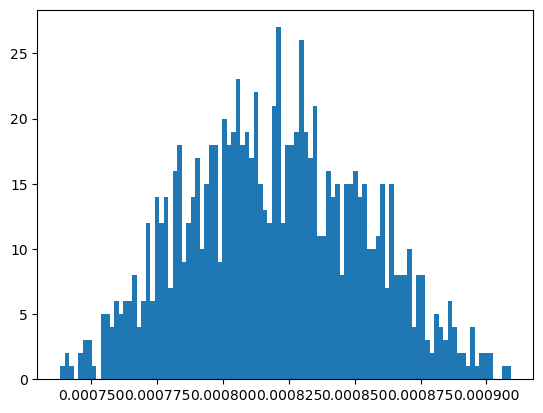

In [11]:
print(gamma_result)

plt.hist(gamma_result, bins=100)